# Young Modulus

<div class='alert alert-info'>
    <p>The students will try, via an atomistic interpretation, to find Young's relation between stress and strain applied to a material in the elastic regime</p>
</div>

## Un peu d'histoire

En 1638, Galilée (1564-1642), mathématicien, géomètre, physicien et astronome italien, publie et finit *Discorsi delle due nuove scienze*, ouvrage dans lequel il développe une nouvelle vision des sciences : l'expérience n'est plus dictée par la logique antique mais par des hypothèses mathématiques et géométriques, que l'expérience même peut confirmer. Galilée énonce explicitement l'autonomie de la science sur la théologie et la philosophie, ce qui lui vaudra bien des soucis ... Dans *Discorsi ...* Galilée donne naissance au concept de la "résistance mécanique des matériaux", cf. figure 1 où on peut voir les dessins réalisés par Galilée pour son étude de la traction et de la flexion d'une poutre.
<p>
<img src="./Images/Young_modulus/FlexionTractionGalilee.png" alt width=450 heigth=350>
<center>Fig. 1 Dessin de Galilee pour l’étude des poutres en flexion et en traction</center>
<p>
A la mort de Galilée, Isaac Newton (1642-1727) nait pour développer quelques années plus tard en 1687 les bien célèbres "Loi de Newton" dans son ouvrage *Philosophiae naturalis principia mathematica*. Dans ces travaux I. Newton discute des forces macroscopiques que subissent les matériaux sous contraintes, comme par exemple le principe des actions réciproques, mais il ne développe aucune information sur les forces au sein même des matériaux.

C'est Robert Hooke (1635-1703) qui en 1679 établit une première réponse avec la loi de l'élasticité, qui avec les travaux de Augustin Cauchy (1789-1857), cent ans plus tard, donne naissance au concept de proportionnalité entre contrainte apliquée aux matériaux et déformation résultante.
<p>
<img src="./Images/Young_modulus/Chercheurs.png" alt width=250 heigth=250>
<center>Fig. 2 De gauche à droite et de bas en haut : Galilée, I. Newton, R. Hooke et A. Cauchy</center>
<p>

## Deformation of a solid: case of the elastic regime

### La loi de Hooke

Lorsqu'on soumet un matériaux à un effort, celui-ci stocke et dissipe l'énergie emmagasinée en se déformant. Pour de faibles contraintes, le matériaux a un comportement élastique, il retrouve sa forme d'origine si on relâche les efforts appliqués. Il y a réversibilité. D'aprés la loi de Hooke la contrainte appliquée $\sigma$ (en *Pa*) est alors proportionnelle à la déformation (ou allongement relatif) $\epsilon$ (sans dimension) soit :

\begin{equation}
	\sigma=E\epsilon,
	\label{equ_Def_Solide_100} \tag{1}
\end{equation}
où $E$, donné en *Pa*, est le coefficient de proportionnalité est appelé le module de Young.

Essayons de retrouver ce résultat !!!

La déformation des matériaux sous contraintes se traduit par la variation des distances interatomiques. Hors les atomes sont liés entre eux par des liaisons qui déterminent la cohésion de la matière.

<div class='alert alert-success'><strong>Question 1</strong>
    
Quelles sont les interactions atomiques que l'on peut retrouver au sein des matériaux ?
</div>

MA REPONSE: Van der Waals, Coulombiennes, liaison covalente/ioniques, etc...

Le potentiel de paire Lennard-Jones est un modèle mathématique simple qui permet de décrire les interactions entre deux atomes. La forme de ce potentiel a été proposée par John Lennard-Jones en 1924,

\begin{equation}
	U_{LJ}(r)=4\kappa\left[\left(\frac{d}{r}\right)^{12}-\left(\frac{d}{r}\right)^{6}\right],
	\label{equ_Def_Solide_200}
\end{equation}
où $r$ est la distance entre deux atomes en interaction, $\kappa$ est la profondeur du puit du potentiel et $d$ la distance où le potentiel s'annule. Le premier terme en $1/r^{12}$ est un terme répulsif décrivant les interactions de Pauli à courte distance liées au recouvrement des orbitales des électrons. Le second terme en $-1/r^{6}$ est un terme attractif à longue portée décrivant entre autre les interactions Van der Waals.

<div class='alert alert-success'><strong>Question 2</strong>
    
Tracer l'évolution du potentiel $U_{LJ}(r)$ et de la force $F_{LJ}(r)$ Lennard Jones entre deux atomes. Identifiez les paramètres du potentiel Lennard-Jones $\kappa$ et $d$, la partie répulsive et attractive du potentiel et calculer la distance d'équilibre $r_{0}$ où la force s'annule.
</div>

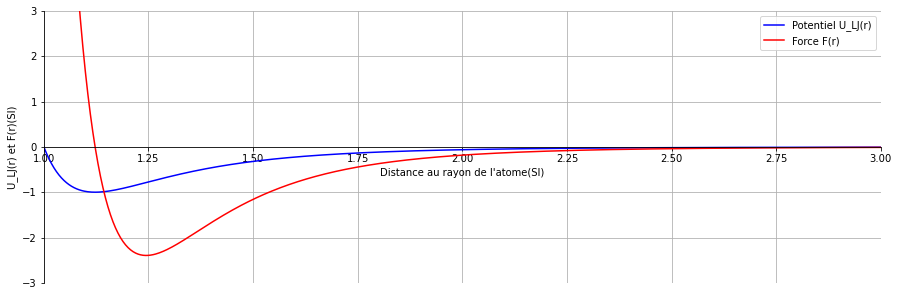

In [45]:
### MOI/
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import figure, gca, xlim, ylim

kappa = 1
d = 1
r = np.linspace(1, 4, 1000)
U_LJ = 4*kappa*((d/r)**12 - (d/r)**6)
F = 24*kappa*(2*d**12/r**13 - d**6/r**7)

fig = figure(figsize=(15,5))
ax = gca()
xlim(1, 3)
ylim(-3,3)
ax.plot(r, U_LJ, color='blue', label='Potentiel U_LJ(r)')# Trace la fonction.
ax.plot(r, F, color='red', label='Force F(r)')# Trace la fonction.
ax.set_xlabel("Distance au rayon de l'atome(SI)")
ax.set_ylabel("U_LJ(r) et F(r)(SI)")  # Axe des ordonnées centré.
ax.spines['right'].set_color('none')  # Pas d’axe à gauche.
ax.spines['bottom'].set_position('zero')  # Axe des abscisses centré.
ax.spines['top'].set_color('none')  # Pas d’axe  en haut.
plt.legend(['Potentiel U_LJ(r)', 'Force F(r)'])
plt.grid()


Rqe: On atteint le minimum de potentiel en r=1.10 donc stabilité atteinte alors force appliqué est nulle ! Image du skieur qui n'avance plus car pente nulle...
Le potentiel(zoomé à l'équilibre) à la forme d'une parabole... Donc a une sorte de force de ressort entre les atomes(pour les ressorts le potentiel a la même gueule...).

<div class='alert alert-success'><strong>Question 3</strong>
    
Comment peut-on trouver la raideur $k$ de la liaison entre deux atomes ? Que vaut-elle à l'équilibre et comment évolue t-elle lorsqu'on comprime ou étire deux atomes à partir de leur position d'équilibre ?
</div>

Calcul de dérivée de F en équilibre... Si on comprime ou étire les deux tendent à revenir à l'équilibre.

<div class='alert alert-success'><strong>Question 4</strong>
    
Pour de faible déformation autour de la position d'équilibre, i.e. $r \approx r_{0}$, on peut approximer la force par un développement limité au premier ordre. Evaluer alors la raideur entre deux atomes.
</div>

Pour le ressort: F = -raideur * $\Delta_x$
or potentiel = primitive de la force... Donc raideur = derivée seconde du potentiel
si on utilise le dvp limité: F(r) = F(r0) + (r-r0) * dF(r0) à l'équilibre F(r0) = 0
donc on peut trouvé dF(r0) = raideur...

Tentons maintenant de passer de la raideur entre deux atomes à la raideur d'un matériaux massif. On va considérer le cas simple où tous les atomes sont organisés sur un réseau cubique simple et reliés par un ressort de raideur $k_{0}$, cf. figure suivante.
<p>
<img src="./Images/Young_modulus/ReseauCubique.png" alt width=250 heigth=250>
<center>Fig. 3 Réseau Cubique</center>
<p>

<div class='alert alert-success'><strong>Question 5</strong>
    
A l'équilibre, quel est le nombre $N$ de liaisons traversant une section de surface $S$ ?
</div>

N = S/(r0^2)

<div class='alert alert-success'><strong>Question 6</strong>
    
Quelle est alors la force la force $f$ que l'on doit appliquer au matériaux pour le déformer suivant une direction ?
</div>

$$ N = \frac {S}{r_o^2} $$
$$ f = Nk_o(r-r_o) $$
$$ \sigma = \frac{f}{S} = \frac{S}{r_o^2S}k_o(r-r_o) $$
$$ \sigma = \frac{k_o}{r_o^2}(r-r_o) = \frac{k_o}{r_o}\frac{r-r_o}{r_o} = E\frac{r-r_o}{r_o} $$

Donc:  $$E = \frac{k_o}{r_o}$$ 


<div class='alert alert-success'><strong>Question 7</strong>
    
En déduire la loi de Hooke.
</div>

cf plus haut

### Vérification numérique de la loi de Hooke

Pour vérifier la loi de Hooke il faudrait simuler tout le réseau cubique d'atomes liés par des ressort comme illustrer sur la figure ci-dessous. Pour simplifier nous allons juste vérifier la justesse de la loi de Hooke dans le cas d'une seule chaine de ressorts.

<div class='alert alert-success'><strong>Question 8</strong>
    
Soit $N$ atomes formant un chaine infinie de masse reliée par des ressorts de raideur $k_{0}$. Quelles sont les équations du mouvement de chacun des atomes ? On notera $m$ la masse d'un atome. 
</div>

<div class='alert alert-success'><strong>Question 9</strong>
    
On va considérer une chaine linéaire de $N$ atomes reliés par des ressorts de raideur $k_{0}$ et tous distants de $x_{0}$ à $t=0$. Un des bouts de la chaine est fixé, et l'autre se déplace à une vitesse de $1mm.s^{-1}$ pour simuler un essai de traction, cf. figure ci-dessous. Intégrer numériquement les équations du mouvement des $N$ atomes afin de retrouver la loi de Hooke.
<p>
<img src="./Images/Young_modulus/ChainAtome4.png" alt width=450 heigth=450>
<center>Fig. 7 Une chaine d'atomes en traction</center>
<p>
</div>

In [3]:
import numpy as np
K = 10 ; uma= 1.66*10**-27 ; n = 55.55 ; a = 156*10**-12 ; X0 = 2.3*a ; V_trac = 10**-3 ; N = 10 ; 
N_iter = 10**5 ; dt = 10**-15; dx = V_trac*dt ; l0 = V_trac*dt; l0=(N+1)*X0 ; X = np.zeros(N+1, N_iter+1) ;

for loop in range(N_iter):
    for atome in range(N):



        


IndentationError: expected an indented block (567761907.py, line 10)